In [65]:
from IPython.display import Image
import pandas as pd
from pathlib import Path
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [66]:
import os

## Journey through Data 

### Step 1: Data Analysis 

In [89]:
#sales_data = pd.read_csv("sales1.csv")
#sales_data.head()

,Title,Company,Updated,Age(u),S,P,Status,Start Date,Created,Age(c),IN,Priority,Max Rate,Salary
0,Help Desk Technician,Buchbinder Tunick & Company LLP,01-13-22,2,0,31,Canceled,NaN,01-12-22,3,0,NaN,NaN,NaN
1,Office Manager/Bookkeeper,"Foumberg, Juneja, Rocher & Co., P.C",01-10-22,5,1,49,Canceled,NaN,01-04-22,11,1,NaN,NaN,NaN
2,Compliance Manager,American Financial Network (AFN),01-06-22,9,0,15,Canceled,NaN,01-03-22,12,0,NaN,NaN,NaN
3,Helpdesk Support Tech,Acra Lending,01-12-22,3,1,40,OnHold,06-28-21,12-21-21,25,1,1,NaN,NaN
4,Logistics Manager,Markwins Beauty Brands Global,01-10-22,5,0,29,Closed - Not Selected,NaN,12-10-21,36,1,NaN,NaN,$70-$75k/yr


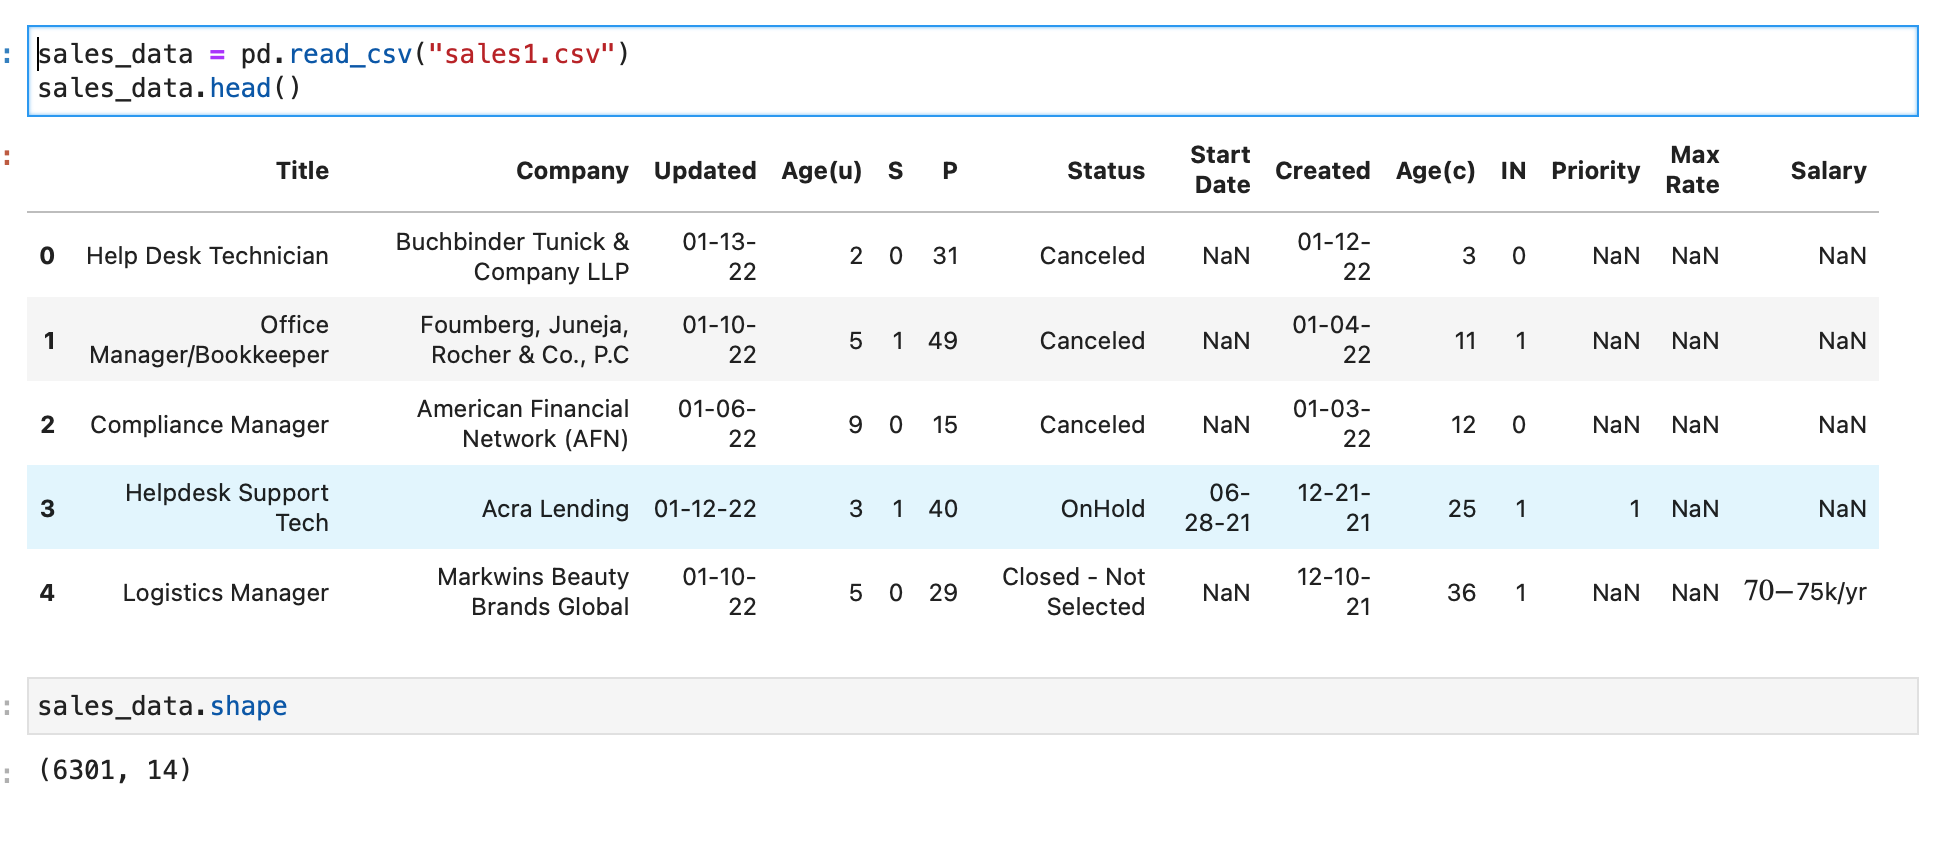

In [90]:
#sales_data.shape

(6301, 14)

# A lot of missing data. Over 5,000! 

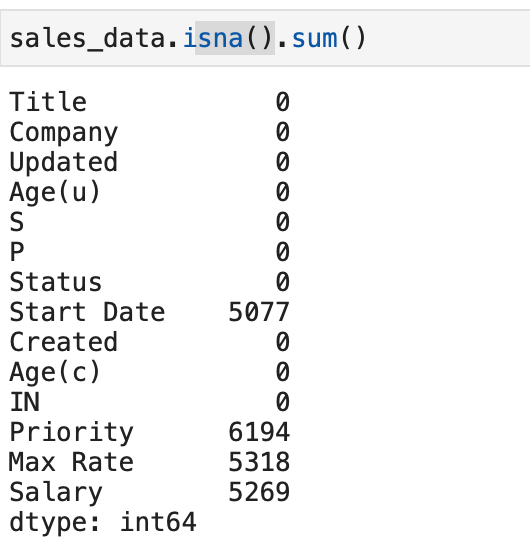

In [ ]:
#sales_data.isna().sum()


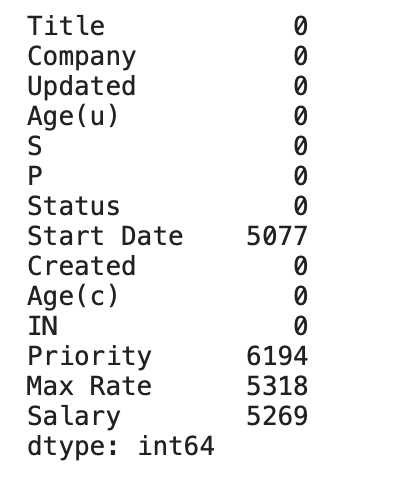

# Work with what you got! 

In [97]:
#sales_data["Company"].value_counts()

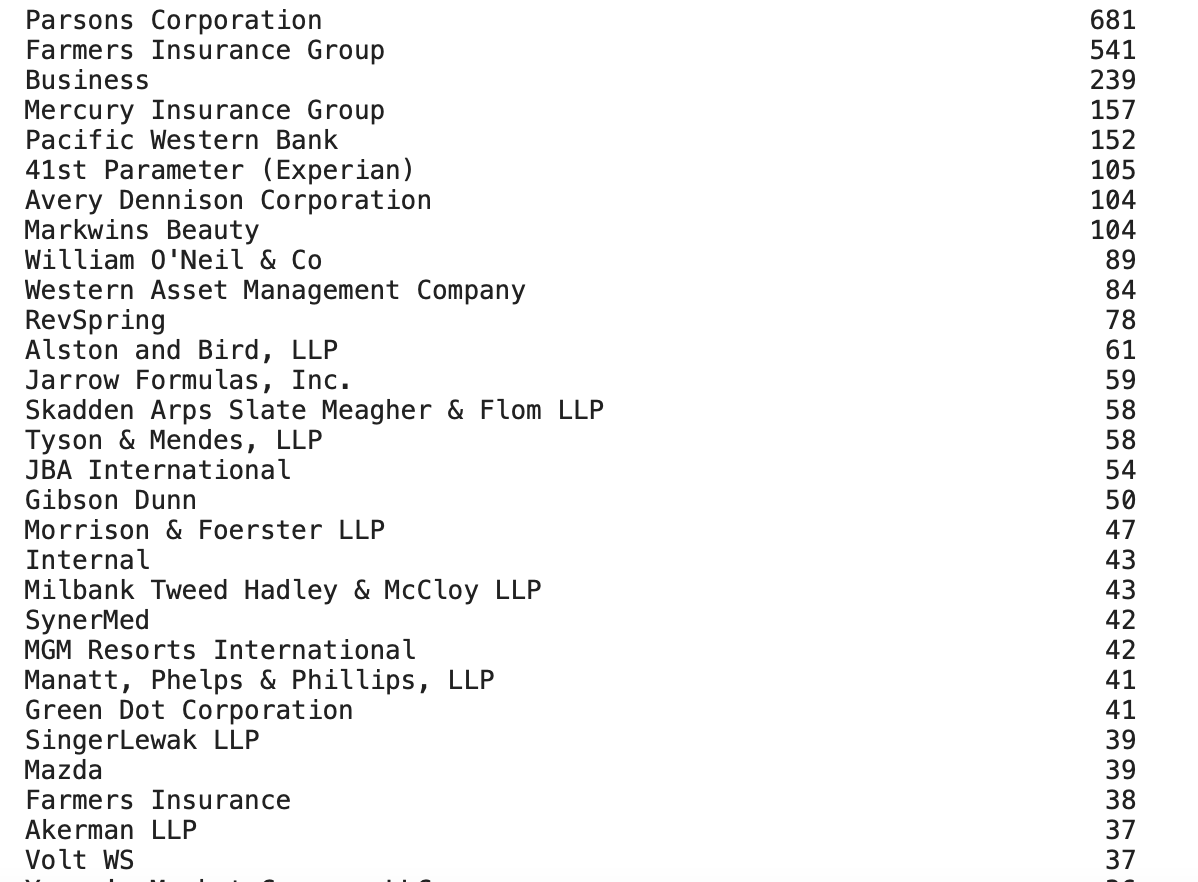

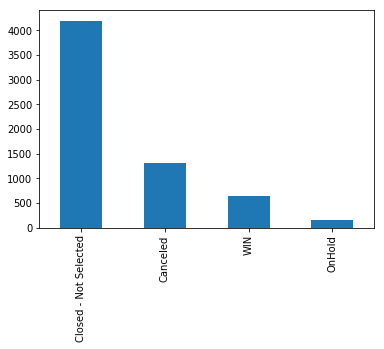

In [96]:
#sales_data["Status"].value_counts().plot(kind="bar")

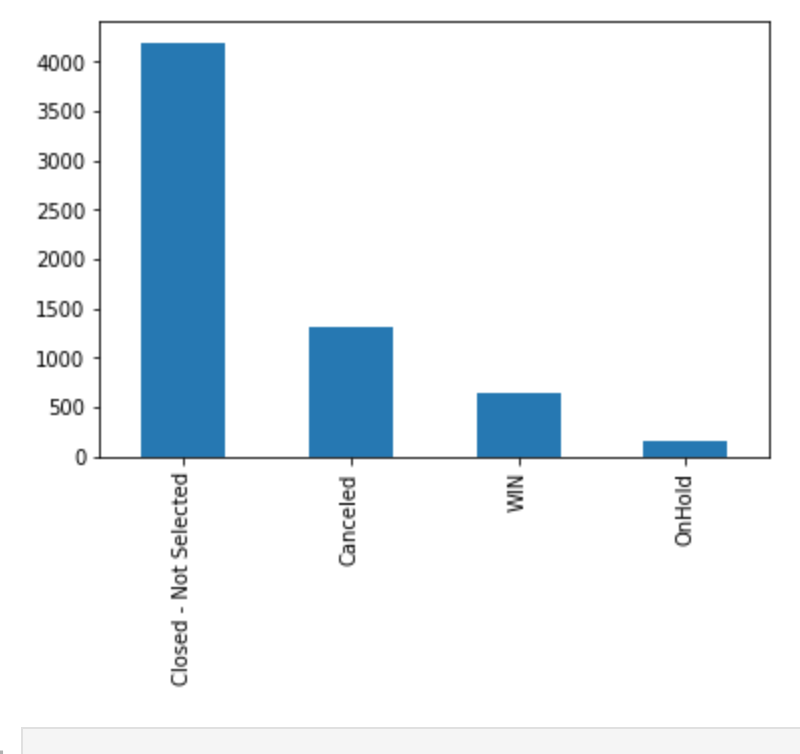

## Market Insight Focus on P&C Industry 

In [67]:
pc_data = pd.read_csv("pandc.csv")
pc_data.head()

,Company Name,Primary City,Primary State,Line Of Business,"Revenue (US Dollars, million)",Total Employees,Primary Industry
0,21st Century Insurance Company of The Southwest,Woodland Hills,CA,"Fire, marine, and casualty insurance",106.000,2000.0,Property/Casualty Insurance Carriers
1,21st Century North America Insurance Company,Wilmington,DE,"Fire, marine, and casualty insurance",156.300,2900.0,Auto & Other Vehicle Insurance Carriers
2,"Accident Fund Holdings, Inc.",Lansing,MI,"Fire, marine, and casualty insurance",592.609,983.0,Workers' Compensation Insurance Carriers
3,Ace Insurance Company,Philadelphia,PA,"Insurance agents, brokers, and service, n",10.100,160.0,Risk Management
4,ACE USA,Philadelphia,PA,"Fire, marine, and casualty insurance",148.900,2898.0,Property/Casualty Insurance Carriers


In [68]:
pc_data["Primary State"].value_counts()

NY    44
CA    41
OH    34
IL    34
PA    30
TX    28
NJ    26
MA    25
CT    23
FL    19
WI    17
MI    16
GA    15
NE    12
NC    11
MN    11
IA    10
MO     9
VA     9
KS     9
IN     8
LA     8
OK     7
TN     7
AZ     7
WA     7
CO     6
NH     6
AL     6
SC     5
MD     4
PR     4
OR     4
NV     4
DE     2
KY     2
ND     2
MS     2
VT     2
NM     2
RI     2
AR     1
WY     1
UT     1
HI     1
ID     1
SD     1
ME     1
AK     1
DC     1
MT     1
Name: Primary State, dtype: int64

In [69]:
pc_data.shape

(530, 7)

In [70]:
pc_data.isna().sum()

Company Name                     0
Primary City                     0
Primary State                    0
Line Of Business                 0
Revenue (US Dollars, million)    0
Total Employees                  3
Primary Industry                 0
dtype: int64

In [71]:
pc_data.dropna(inplace=True)

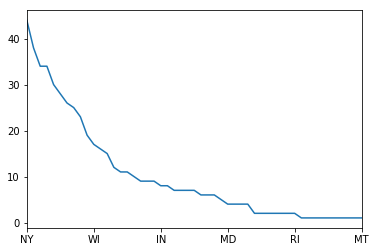

In [72]:
#Total number of companies by State
pc_data["Primary State"].value_counts().plot()


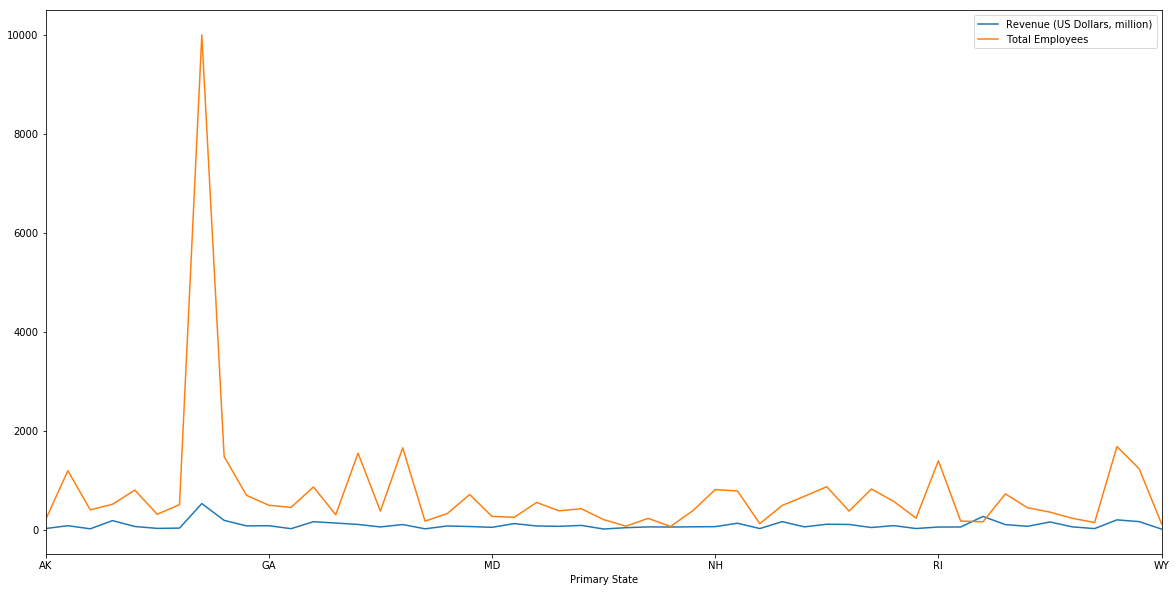

In [73]:
pc_data.groupby("Primary State").mean().plot(figsize = (20,10))

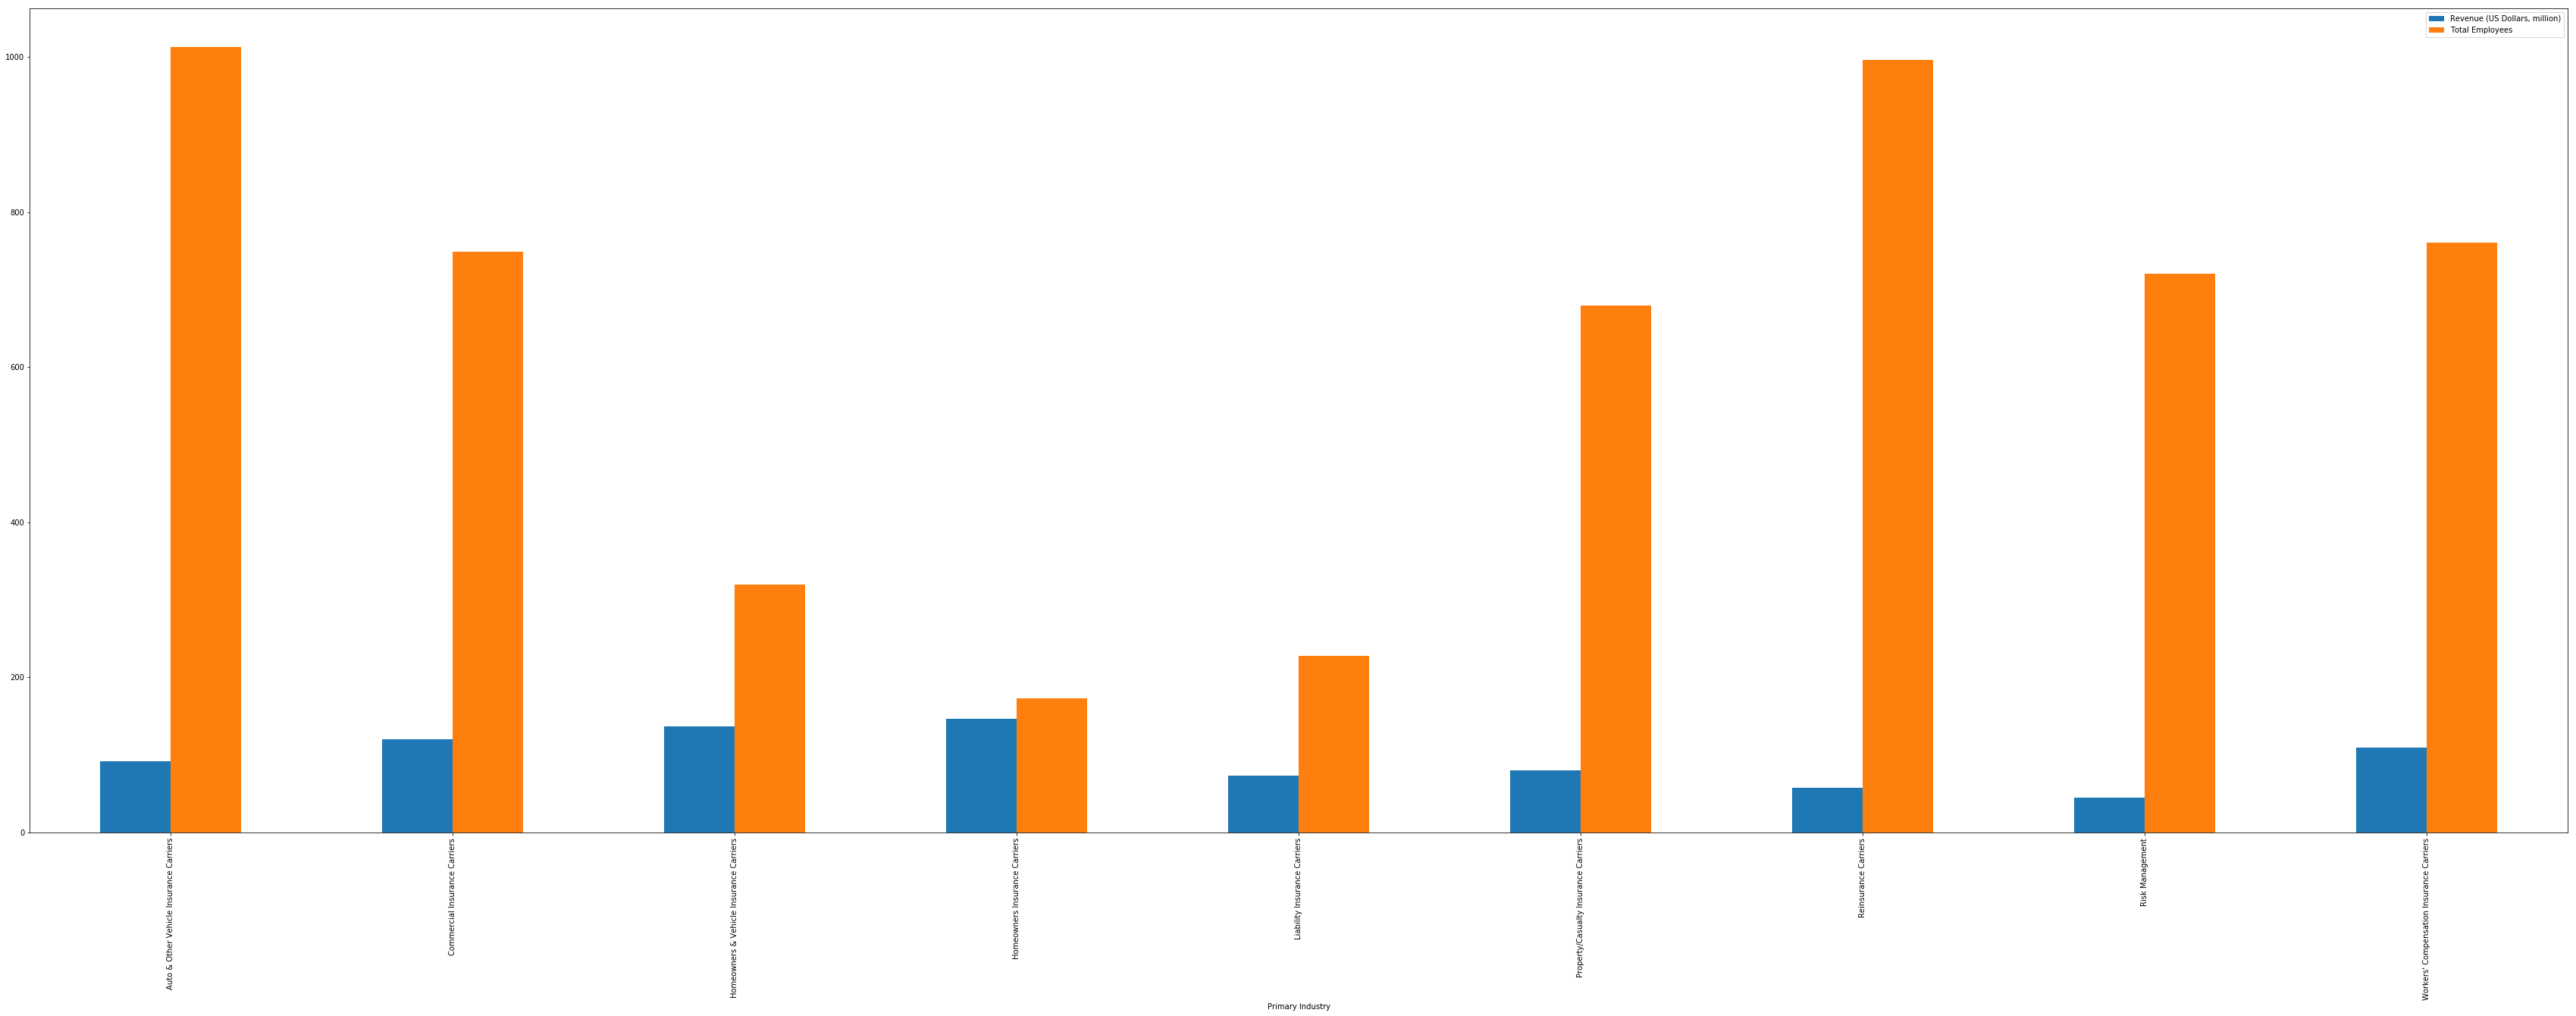

In [74]:
pc_data.groupby("Primary Industry").mean().plot.bar(figsize = (60,20))

In [75]:
# Slice data and group
pc_data_grp = (
    pc_data[["Primary State", "Line Of Business"]]
    .groupby(["Primary State"])
    .count()
    .reset_index()
)
pc_data.head()

,Company Name,Primary City,Primary State,Line Of Business,"Revenue (US Dollars, million)",Total Employees,Primary Industry
0,21st Century Insurance Company of The Southwest,Woodland Hills,CA,"Fire, marine, and casualty insurance",106.000,2000.0,Property/Casualty Insurance Carriers
1,21st Century North America Insurance Company,Wilmington,DE,"Fire, marine, and casualty insurance",156.300,2900.0,Auto & Other Vehicle Insurance Carriers
2,"Accident Fund Holdings, Inc.",Lansing,MI,"Fire, marine, and casualty insurance",592.609,983.0,Workers' Compensation Insurance Carriers
3,Ace Insurance Company,Philadelphia,PA,"Insurance agents, brokers, and service, n",10.100,160.0,Risk Management
4,ACE USA,Philadelphia,PA,"Fire, marine, and casualty insurance",148.900,2898.0,Property/Casualty Insurance Carriers


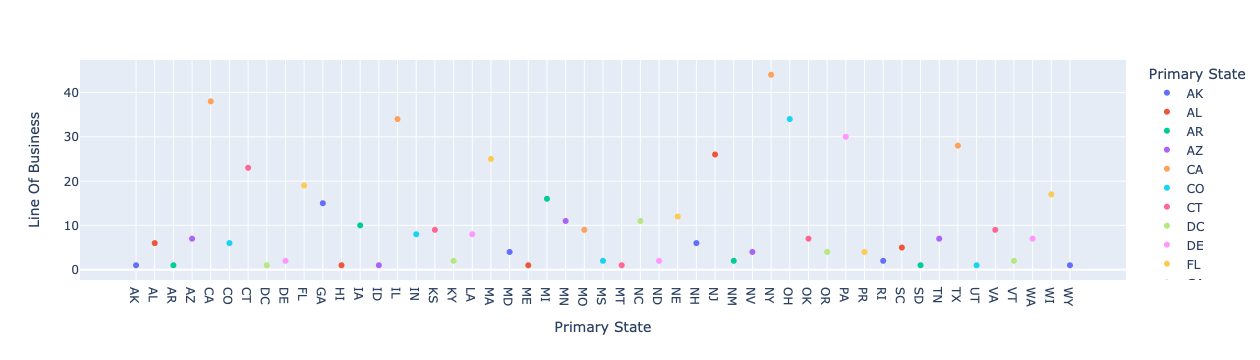

In [76]:
px.scatter(pc_data_grp, x="Primary State", y="Line Of Business", color="Primary State")

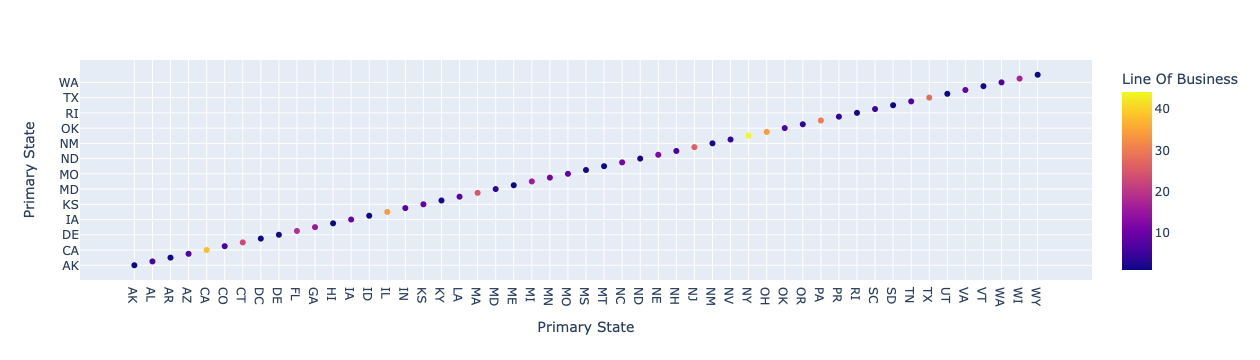

In [77]:
px.scatter(pc_data_grp, x="Primary State", y="Primary State", color="Line Of Business")

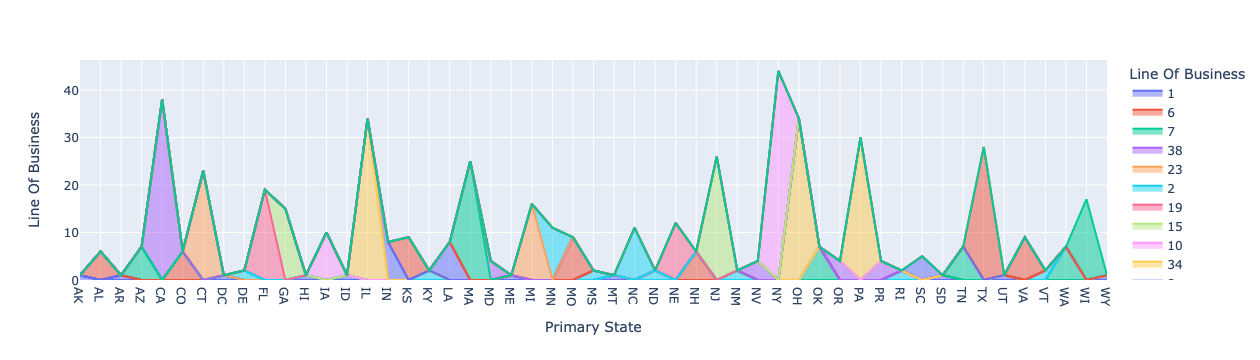

In [78]:
px.area(
    pc_data_grp,
    x="Primary State",
    y="Line Of Business",
    color="Line Of Business",
    line_group="Primary State",
)

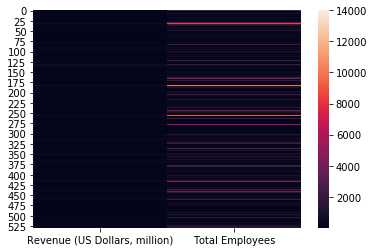

In [79]:
sns.heatmap(pc_data_rev_emp)